<a href="https://colab.research.google.com/github/ambergnar/Fall2020/blob/master/STA5195Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BIOLOGY INTO MATH

In [1]:
# Getting uniprot database:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *

  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-aqgk6in0
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-aqgk6in0
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-cp36-none-any.whl size=7322 sha256=4ea66403bd8db74b3e35e830126863b31272c8075c1cd102dcc281373ee3ee62
  Stored in directory: /tmp/pip-ephem-wheel-cache-h37w0q7k/wheels/89/93/47/ef43fe80a5b823a05d8dcca5ed1581f4fcdacf69b27110603f
Successfully built ImportMPCR
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
# Create a dataset from the uniprot database:
X, Y = get_uniprot_data('=antibody', '!antibody', 2000)

In [3]:
number_X = len(X)
number_Y = len(Y)

In [4]:
print(number_X)
print(number_Y)

2000
2000


In [5]:
# Amino acid sequence of the first protein on the list of proteins associated with 'antibody'
X[0]

'medidqsslvssstdspprpppafkyqfvtepedeedeeeeedeeeddedleelevlerkpaaglsaaavppaaaaplldfssdsvppaprgplpaappaaperqpswerspaapapslppaaavlpsklpeddepparppppppagasplaepaappstpaapkrrgsgsvdetlfalpaasepvipssaekimdlmeqpgntvssgqedfpsvlletaaslpslsplstvsfkehgylgnlsavsssegtieetlneaskelperatnpfvnrdlaefseleysemgssfkgspkgesailventkeevivrskdkedlvcsaalhspqespvgkedrvvspektmdifnemqmsvvapvreeyadfkpfeqawevkdtyegsrdvlaaranveskvdrkcledsleqkslgkdsegrnedasfpstpepvkdssrayitcasftsatesttantfplledhtsenktdekkieerkaqiitektspktsnpflvavqdseadyvttdtlskvteaavsnmpegltpdlvqeaceselneatgtkiayetkvdlvqtseaiqeslyptaqlcpsfeeaeatpspvlpdivmeaplnsllpsagasvvqpsvspleapppvsydsiklepenpppyeeamnvalkalgtkegikepesfnaavqeteapyisiacdliketklstepspdfsnyseiakfeksvpehaelvedsspesepvdlfsddsipevpqtqeeavmlmkesltevsetvaqhkeerlsaspqelgkpylesfqpnlhstkdaasndiptltkkekislqmeefntaiysnddllsskedkikesetfsdsspieiidefptfvsakddspklakeytdlevsdkseianiqsgadslpclelpcdlsfkniypkdevhvsdefsenrssvskasispsnvsalepqtemgsivksksltkeaekklpsdtekedrslsavlsaelsktsvvdllywrdikktgvvfgaslfll

In [6]:
# Convert protein strings of letters into vectors of numbers:
def process_strings(c):
    '''Takes in a list of sequences 'c' and turns each one
       into a list of numbers.'''
       
    X = []
            
    for  m, seq in enumerate(c):
        x = [] 
        for letter in seq:
            x.append(max(ord(letter)-97, 0))
        
        X.append(x)
        
    return X

In [7]:
X = process_strings(X)
Y = process_strings(Y)

In [9]:
print(X[0])

[12, 4, 3, 8, 3, 16, 18, 18, 11, 21, 18, 18, 18, 19, 3, 18, 15, 15, 17, 15, 15, 15, 0, 5, 10, 24, 16, 5, 21, 19, 4, 15, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 4, 3, 11, 4, 4, 11, 4, 21, 11, 4, 17, 10, 15, 0, 0, 6, 11, 18, 0, 0, 0, 21, 15, 15, 0, 0, 0, 0, 15, 11, 11, 3, 5, 18, 18, 3, 18, 21, 15, 15, 0, 15, 17, 6, 15, 11, 15, 0, 0, 15, 15, 0, 0, 15, 4, 17, 16, 15, 18, 22, 4, 17, 18, 15, 0, 0, 15, 0, 15, 18, 11, 15, 15, 0, 0, 0, 21, 11, 15, 18, 10, 11, 15, 4, 3, 3, 4, 15, 15, 0, 17, 15, 15, 15, 15, 15, 15, 0, 6, 0, 18, 15, 11, 0, 4, 15, 0, 0, 15, 15, 18, 19, 15, 0, 0, 15, 10, 17, 17, 6, 18, 6, 18, 21, 3, 4, 19, 11, 5, 0, 11, 15, 0, 0, 18, 4, 15, 21, 8, 15, 18, 18, 0, 4, 10, 8, 12, 3, 11, 12, 4, 16, 15, 6, 13, 19, 21, 18, 18, 6, 16, 4, 3, 5, 15, 18, 21, 11, 11, 4, 19, 0, 0, 18, 11, 15, 18, 11, 18, 15, 11, 18, 19, 21, 18, 5, 10, 4, 7, 6, 24, 11, 6, 13, 11, 18, 0, 21, 18, 18, 18, 4, 6, 19, 8, 4, 4, 19, 11, 13, 4, 0, 18, 10, 4, 11, 15, 4, 17, 0, 19, 13, 15, 5, 21, 13, 17, 3, 11, 0, 4

In [10]:
print(Y[0])

[12, 4, 0, 11, 21, 24, 19, 5, 11, 11, 21, 6, 19, 11, 6, 8, 8, 5, 5, 18, 8, 5, 5, 17, 3, 15, 15, 17, 12, 8, 10]


(array([109.,   0.,   8.,  70., 139.,  38.,  34.,  11.,  49.,   0.,  75.,
        106.,  16.,  31.,   0., 104.,  31.,  29., 144.,  61.,   0.,  79.,
          4.,   0.,  25.]),
 array([ 0.  ,  0.96,  1.92,  2.88,  3.84,  4.8 ,  5.76,  6.72,  7.68,
         8.64,  9.6 , 10.56, 11.52, 12.48, 13.44, 14.4 , 15.36, 16.32,
        17.28, 18.24, 19.2 , 20.16, 21.12, 22.08, 23.04, 24.  ]),
 <a list of 25 Patch objects>)

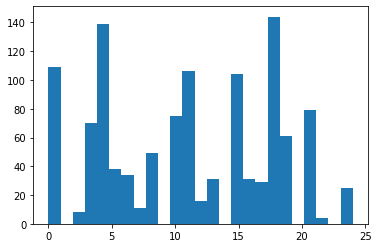

In [11]:
# Plot their distribution:
plt.hist(X[0],25)

(array([1., 0., 0., 1., 1., 5., 2., 0., 4., 0., 1., 4., 2., 0., 0., 2., 0.,
        2., 1., 2., 0., 2., 0., 0., 1.]),
 array([ 0.  ,  0.96,  1.92,  2.88,  3.84,  4.8 ,  5.76,  6.72,  7.68,
         8.64,  9.6 , 10.56, 11.52, 12.48, 13.44, 14.4 , 15.36, 16.32,
        17.28, 18.24, 19.2 , 20.16, 21.12, 22.08, 23.04, 24.  ]),
 <a list of 25 Patch objects>)

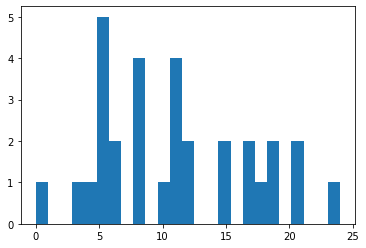

In [12]:
plt.hist(Y[0],25)

In [13]:
# Meaningful stats?
np.mean(X[0]),np.std(X[0])

(11.00859845227859, 6.89123922101607)

In [15]:
# Shape:
np.array(X[0]).shape

(1163,)

In [16]:
# Finding lengths of all protiens:
X_lengths = [len(s) for s in X]
Y_lengths = [len(s) for s in Y]

In [17]:
np.max(X_lengths)

5654

In [18]:
np.max(Y_lengths)

6631

In [19]:
np.min(X_lengths)

5

In [20]:
np.min(Y_lengths)

6

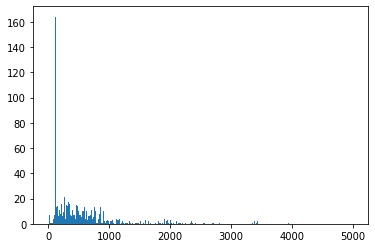

In [21]:
# Plot distributions:
plt.hist(X_lengths,bins=1000,range=(0,5000));

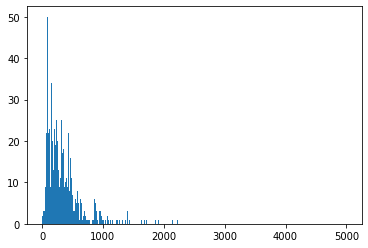

In [22]:
plt.hist(Y_lengths,bins=1000,range=(0,5000));